# Project on Rainfall Prediction - Weather Forecasting

# Importing necessary libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Importing dataset from GitHub Raw link

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape # Checking the shape of this data set.

(8425, 23)

# Exploratory Data Analysis

In [4]:
df.duplicated().sum() # Checking Duplicate values

1663

In [5]:
# we will drop this duplicate data from our data set.
df=df.drop_duplicates()
df.shape

(6762, 23)

In [6]:
df.isnull().sum() # Checking nan in all the columns.

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [7]:
df.isnull().sum()*100/len(df) # Checking nan in all the columns in percentage form.

Date              0.000000
Location          0.000000
MinTemp           1.035197
MaxTemp           0.842946
Rainfall          2.040816
Evaporation      43.197279
Sunshine         47.855664
WindGustDir      13.930790
WindGustSpeed    13.930790
WindDir9am       11.742088
WindDir3pm        4.347826
WindSpeed9am      0.931677
WindSpeed3pm      1.478852
Humidity9am       0.798580
Humidity3pm       1.419698
Pressure9am      19.343390
Pressure3pm      19.387755
Cloud9am         27.595386
Cloud3pm         28.127773
Temp9am           0.754215
Temp3pm           1.360544
RainToday         2.040816
RainTomorrow      2.040816
dtype: float64

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df=df.drop(['Date', 'Location','Cloud9am', 'Cloud3pm','Evaporation','Sunshine'],axis=1)
df.head() # rechecking the dataset.

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [10]:
# We will also drop nan from rows as percentage wise there is very less data which will be drop.
df=df.dropna(axis=0)
df.shape

(4887, 17)

In [11]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [12]:
df.isnull().sum() # Check again.

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,4887.0,13.562492,5.468918,-1.3,9.5,13.6,17.8,28.5
MaxTemp,4887.0,24.438122,6.265356,8.2,19.9,23.8,28.9,45.5
Rainfall,4887.0,2.741948,9.387505,0.0,0.0,0.0,0.8,225.0
WindGustSpeed,4887.0,40.302230,14.004769,11.0,30.0,39.0,48.0,107.0
WindSpeed9am,4887.0,15.159402,9.096976,2.0,7.0,13.0,20.0,61.0
WindSpeed3pm,4887.0,19.258850,8.716431,2.0,13.0,19.0,26.0,61.0
Humidity9am,4887.0,65.262738,17.160941,10.0,53.0,66.0,78.0,100.0
Humidity3pm,4887.0,49.894823,18.872474,6.0,37.0,50.0,62.0,99.0
Pressure9am,4887.0,1017.430284,6.640052,989.8,1012.9,1017.4,1021.9,1039.0
Pressure3pm,4887.0,1014.932065,6.567478,982.9,1010.2,1015.0,1019.4,1036.0


All the features are looking normal now.

In [14]:
df.dtypes # Checking Data types of all the columns once again.

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Visualization of Data

We will check all the categorical data with countplot

E      474
SW     401
N      394
W      372
WSW    358
WNW    332
S      314
SSE    303
SE     298
ENE    292
NW     256
NE     250
SSW    248
NNE    228
ESE    216
NNW    151
Name: WindGustDir, dtype: int64


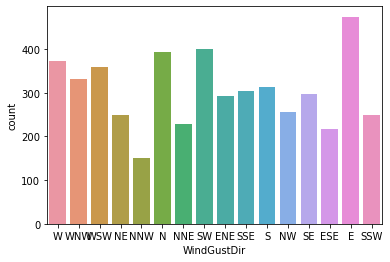

In [15]:
ax=sns.countplot(x='WindGustDir',data=df) 
print(df['WindGustDir'].value_counts())

N      488
SW     461
ENE    373
WSW    350
SE     335
E      318
NNE    307
SSW    283
W      273
NW     268
WNW    268
NE     265
S      262
SSE    258
ESE    205
NNW    173
Name: WindDir9am, dtype: int64


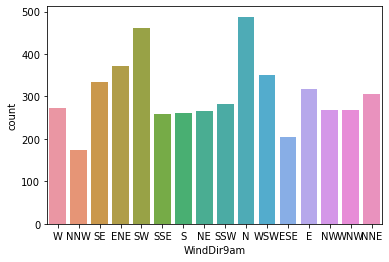

In [16]:
ax=sns.countplot(x='WindDir9am',data=df)
print(df['WindDir9am'].value_counts())

WSW    431
S      389
SSE    357
W      348
E      340
WNW    327
SW     326
SE     318
NE     305
N      292
ESE    291
ENE    285
NNE    244
NW     217
SSW    210
NNW    207
Name: WindDir3pm, dtype: int64


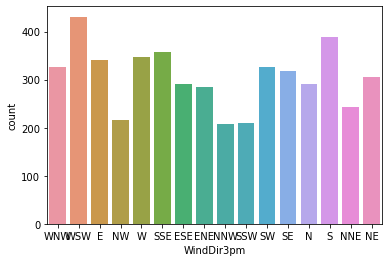

In [17]:
ax=sns.countplot(x='WindDir3pm',data=df)
print(df['WindDir3pm'].value_counts())

No     3719
Yes    1168
Name: RainToday, dtype: int64


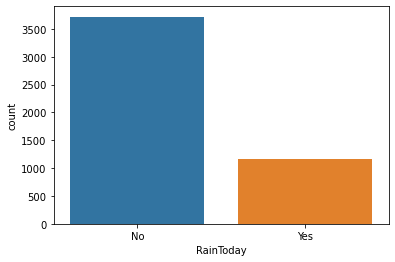

In [18]:
ax=sns.countplot(x='RainToday',data=df)
print(df['RainToday'].value_counts())

No     3726
Yes    1161
Name: RainTomorrow, dtype: int64


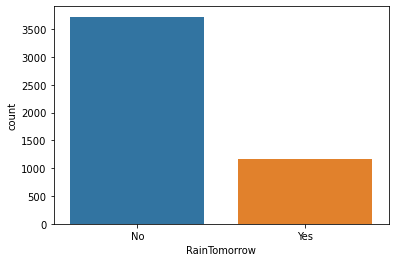

In [19]:
ax=sns.countplot(x='RainTomorrow',data=df)
print(df['RainTomorrow'].value_counts())

In [ ]:
from above plot we can say that, there is no chance for rainfall tomorrow.

# Checking the distribution of the continuous values of float type columns

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

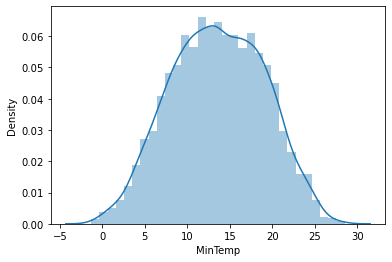

In [20]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

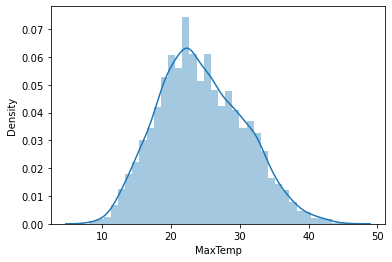

In [21]:
sns.distplot(df['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

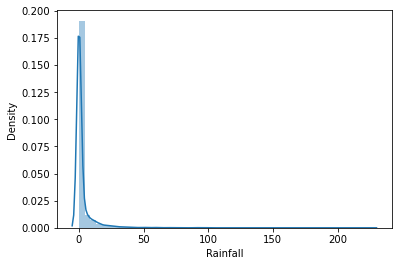

In [22]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

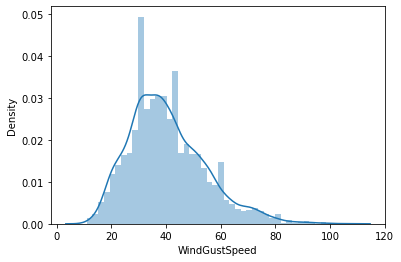

In [23]:
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

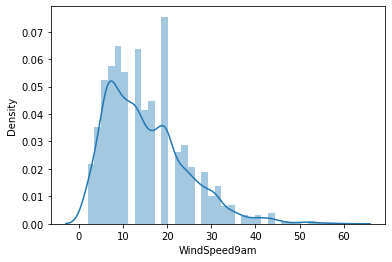

In [24]:
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

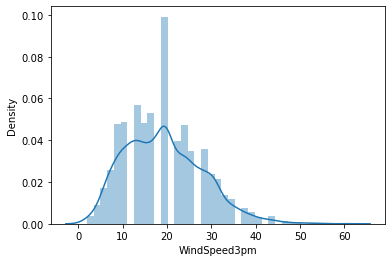

In [25]:
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

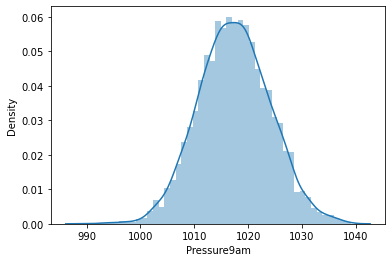

In [26]:
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

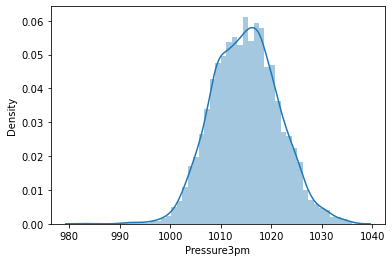

In [27]:
sns.distplot(df['Pressure3pm'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

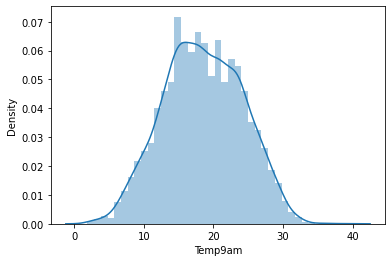

In [28]:
sns.distplot(df['Temp9am'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

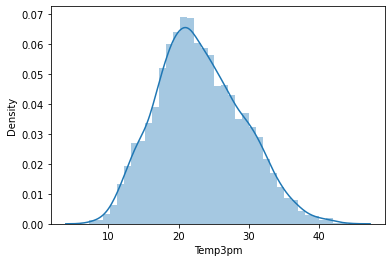

In [29]:
sns.distplot(df['Temp3pm'])

In [30]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df['Rainfall']=le.fit_transform(df['Rainfall'])

In [32]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,3,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,6,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


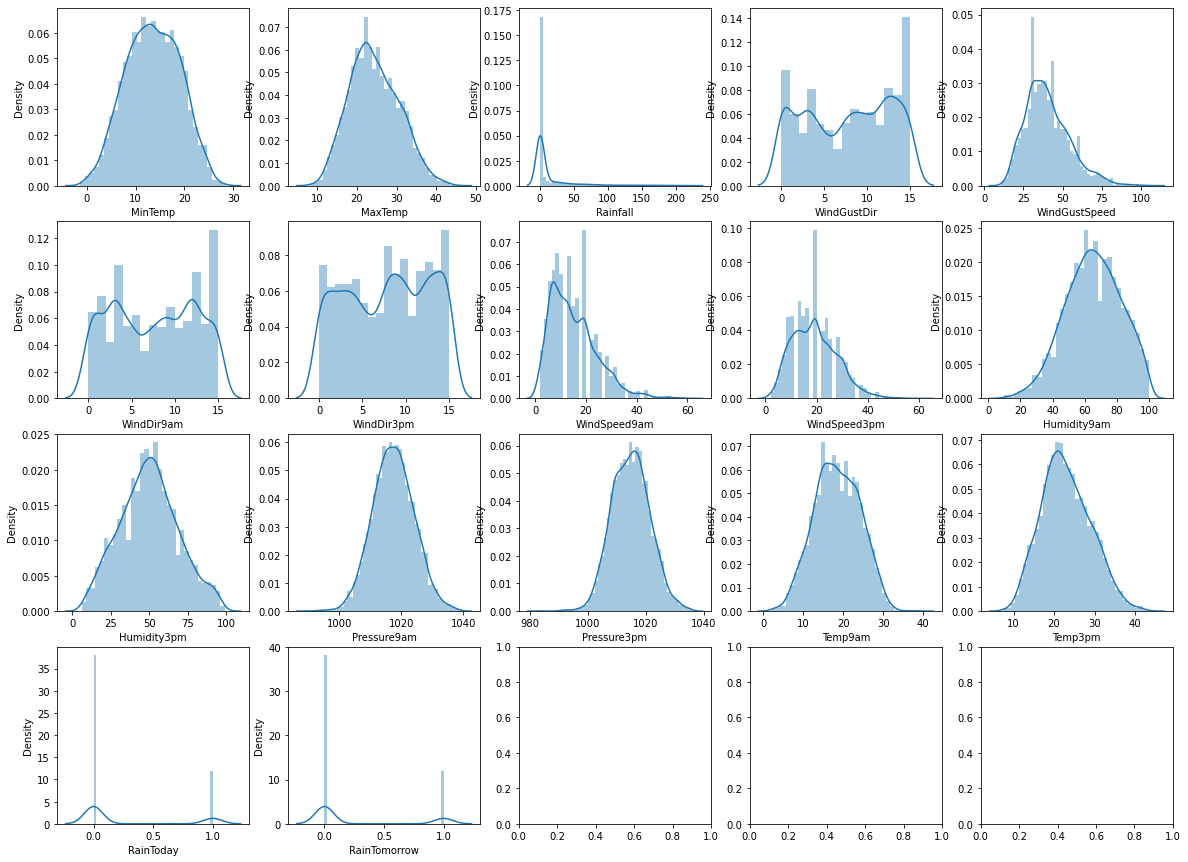

In [33]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

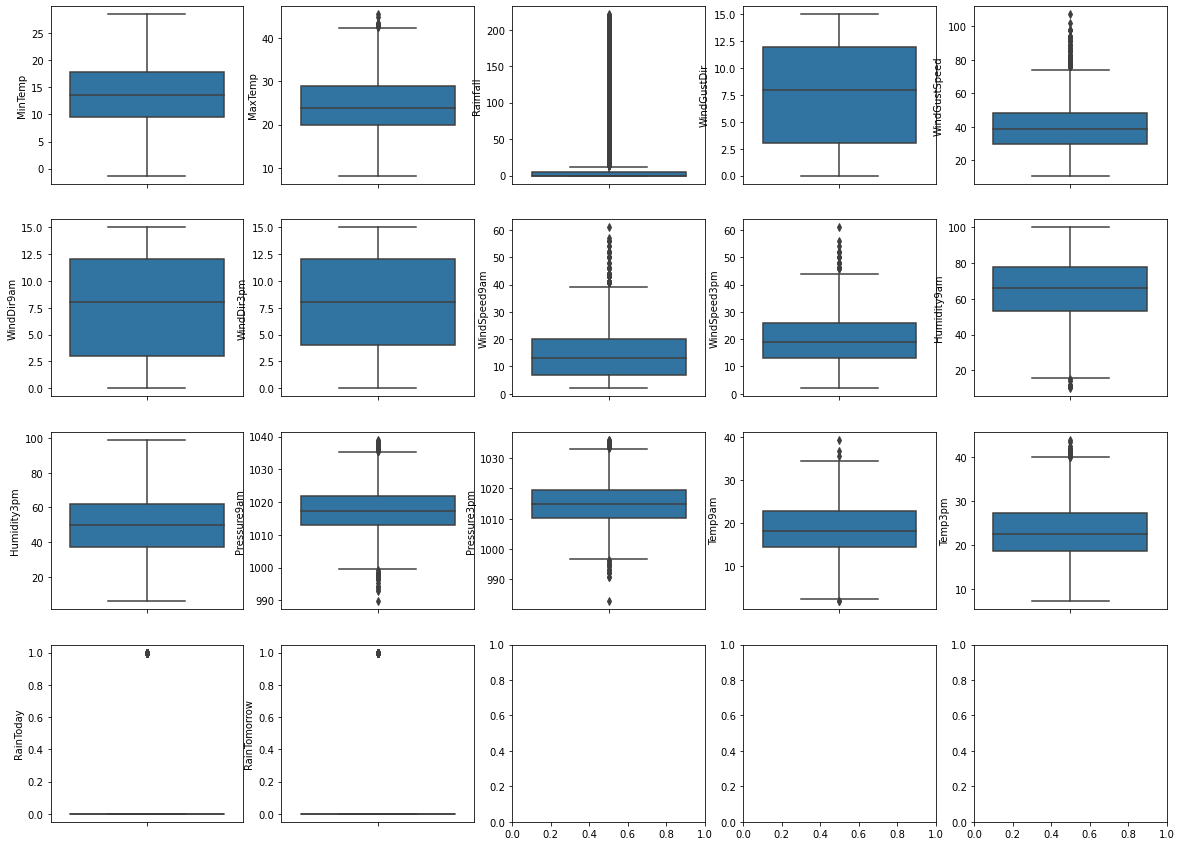

In [34]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], )
    index += 1
plt.show()

In [35]:
import scipy.stats as stats
from scipy.stats import zscore

In [36]:
df.shape

(4887, 17)

In [37]:
# by z-score method
threshold=3
z=np.abs(zscore(df))
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,3,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,6,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
8420,2.8,23.4,0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,3.6,25.3,0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,5.4,26.9,0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [38]:
Data_loss=(4887-4477)/4887
Data_loss

0.08389605074687947

# Divide the Data set into tow parts

In [40]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,-0.007727,-0.251355,-0.271015,1.091494,0.365757,1.163536,1.289348,0.654340,0.621790,0.358958,-1.483580,-1.552320,-1.260028,-0.271889,-0.206073,-0.52103
1,-1.102901,0.103443,-0.420524,1.295052,0.365757,-0.315576,1.498059,-1.273018,0.380006,-1.250061,-1.321153,-1.100337,-1.150054,-0.219027,0.207258,-0.52103
2,-0.098992,0.200206,-0.420524,1.498610,0.521081,1.163536,1.498059,0.533880,0.863574,-1.607620,-1.050443,-1.567906,-1.008660,0.450561,0.025392,-0.52103
3,-0.774349,0.571131,-0.420524,-0.740529,-1.187483,0.318329,-1.632606,-0.429799,-1.191590,-1.190468,-1.808432,-0.009343,-0.364531,-0.060440,0.570989,-0.52103
4,0.740642,1.264599,-0.121506,1.091494,0.132771,-1.372084,-0.171629,-0.911638,0.138222,1.014484,-0.888017,-1.069166,-1.432843,-0.113302,1.100053,-0.52103


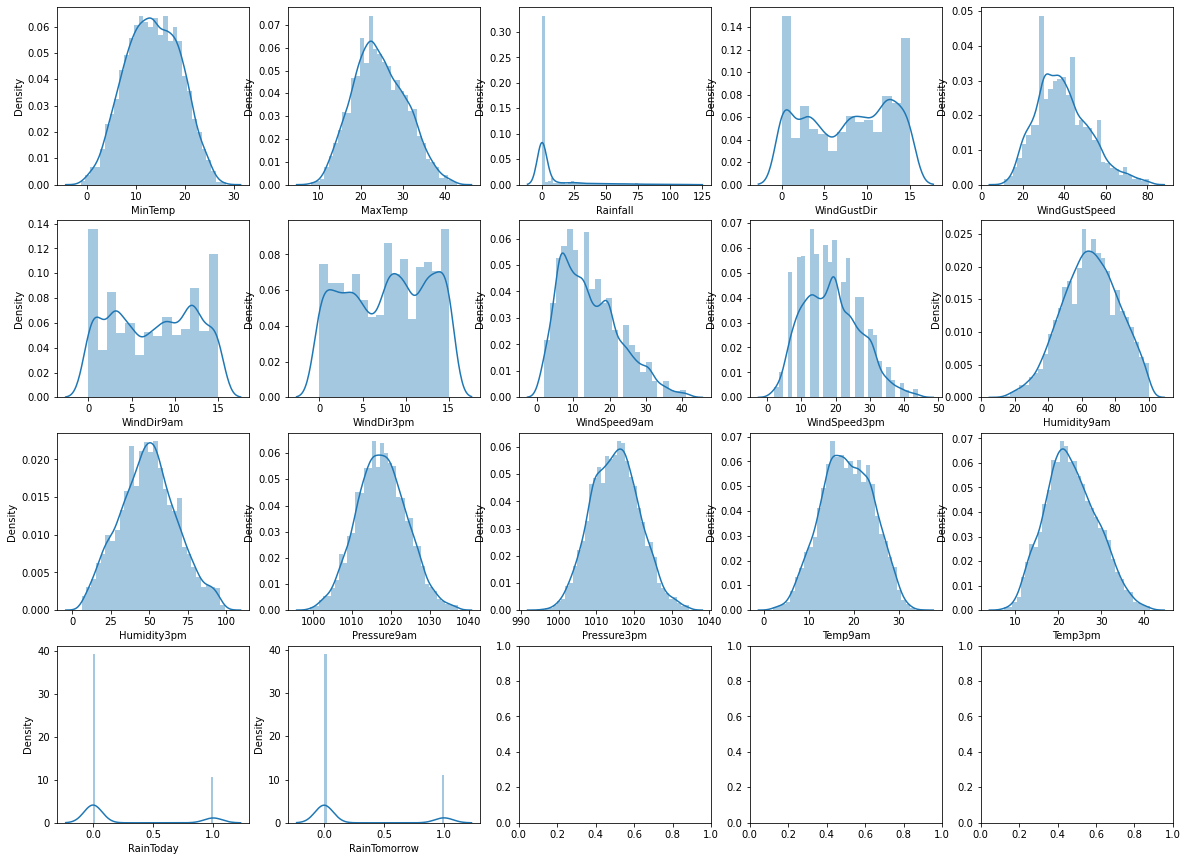

In [42]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

# Checking the Correlation with Heatmap

<AxesSubplot:>

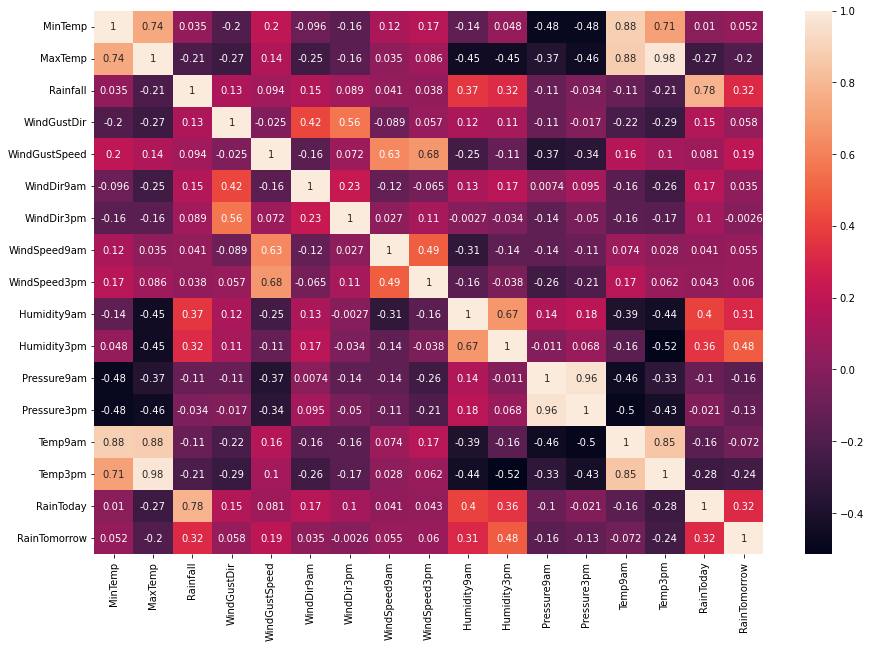

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split # import Library

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.25)

# Import metrics 

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[850  50]
 [112 139]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       900
           1       0.74      0.55      0.63       251

    accuracy                           0.86      1151
   macro avg       0.81      0.75      0.77      1151
weighted avg       0.85      0.86      0.85      1151

0.8592528236316247


# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)rf
pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))
print(accuracy_score(y_test,pred_dt))

[[766 134]
 [115 136]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       900
           1       0.50      0.54      0.52       251

    accuracy                           0.78      1151
   macro avg       0.69      0.70      0.69      1151
weighted avg       0.79      0.78      0.79      1151

0.7836663770634231


# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))

[[862  38]
 [110 141]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       900
           1       0.79      0.56      0.66       251

    accuracy                           0.87      1151
   macro avg       0.84      0.76      0.79      1151
weighted avg       0.87      0.87      0.86      1151

0.8714161598609904


# From all above Random Forest Classifier is giving 87% accuracy

# 
  
  
  
  
  # Hyper parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [67]:
gdtc = GridSearchCV(estimator= rf, param_grid=param_grid, cv= 3)
gdtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [68]:
gdtc.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [74]:
gdtc1 = RandomForestClassifier(random_state = 343, max_depth = 12, criterion = 'entropy')
gdtc1.fit(x_train, y_train)
predgdtc1 = gdtc1.predict(x_test)
print (accuracy_score(y_test, predgdtc1))
print (confusion_matrix(y_test, predgdtc1))
print (classification_report(y_test, predgdtc1))

0.8688097306689835
[[864  36]
 [115 136]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       900
           1       0.79      0.54      0.64       251

    accuracy                           0.87      1151
   macro avg       0.84      0.75      0.78      1151
weighted avg       0.86      0.87      0.86      1151



# Cross Validation Score

In [76]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(gdtc1, x, y, cv = 5)
print ('Cross Validation Score for ',gdtc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=12, random_state=343)  model is : 0.836885002124345


We have checked that difference between accuracy and CV Score is very less. so we can say it is a good model.

In [87]:
# import pickle

filename = 'Rainfallgdtc.pkl'
pickle.dump(gdtc1, open(filename, 'wb'))

# Conclusion

In [88]:
loaded_model = pickle.load(open('Rainfallgdtc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8688097306689835


In [89]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predgdtc1[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150
Predicted,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Original,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
